In [ ]:
import warnings
warnings.filterwarnings('ignore')  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os  
Root_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

train_dir = Root_dir + "/train"

valid_dir = Root_dir + "/valid"

test_dir = "/kaggle/input/new-plant-diseases-dataset/test/test"
Diseases_classes = os.listdir(train_dir)

Diseases_classes_val = os.listdir(valid_dir)

Diseases_classes_test = os.listdir(test_dir)

print(str(Diseases_classes))
print(f"\n")

print(f"Train Dataset labels: {len(Diseases_classes)} \n"
      f"Validation labels: {len(Diseases_classes_val)} \n"
      f"Test labels: {len(Diseases_classes_test)}")


['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

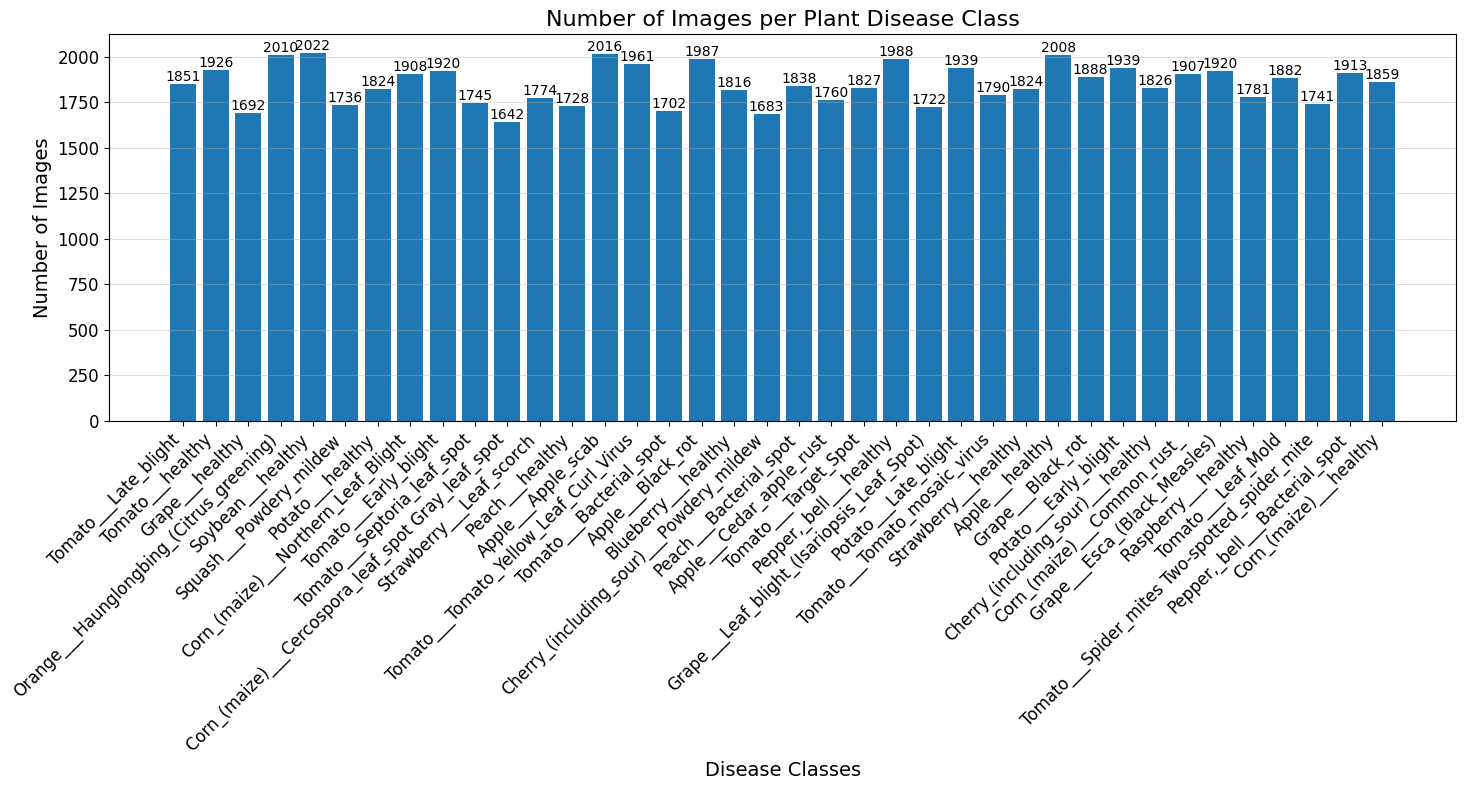


Image Count Summary:
Tomato___Late_blight          :  1851 images
Tomato___healthy              :  1926 images
Grape___healthy               :  1692 images
Orange___Haunglongbing_(Citrus_greening):  2010 images
Soybean___healthy             :  2022 images
Squash___Powdery_mildew       :  1736 images
Potato___healthy              :  1824 images
Corn_(maize)___Northern_Leaf_Blight:  1908 images
Tomato___Early_blight         :  1920 images
Tomato___Septoria_leaf_spot   :  1745 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot:  1642 images
Strawberry___Leaf_scorch      :  1774 images
Peach___healthy               :  1728 images
Apple___Apple_scab            :  2016 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus:  1961 images
Tomato___Bacterial_spot       :  1702 images
Apple___Black_rot             :  1987 images
Blueberry___healthy           :  1816 images
Cherry_(including_sour)___Powdery_mildew:  1683 images
Peach___Bacterial_spot        :  1838 images
Apple___Cedar_apple_rust 

In [ ]:
import matplotlib.pyplot as plt 
import os  
from colorama import Fore, Style 

label_counts = {}  
for label in Diseases_classes:
    image_paths = os.listdir(os.path.join(train_dir, label))  
    label_counts[label] = len(image_paths)  

plt.figure(figsize=(15, 8))  
bars = plt.bar(label_counts.keys(), label_counts.values())

plt.title('Number of Images per Plant Disease Class', fontsize=16)  
plt.xlabel('Disease Classes', fontsize=14)  
plt.ylabel('Number of Images', fontsize=14)  
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(axis='y', alpha=0.4) 
for bar in bars:
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width()/2., height,  
             f'{int(height)}', 
             ha='center', va='bottom', fontsize=10) 

plt.tight_layout() 
plt.show()  

print(Fore.GREEN + "\nImage Count Summary:")  
for label, count in label_counts.items():
    print(f"{label:<30}: {count:>5} images")  
print(Style.RESET_ALL + f"\nTotal images: {sum(label_counts.values())}")


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader  
from PIL import Image  
import torchvision
import torchvision.transforms as transforms  
from torchvision.datasets import ImageFolder  
import torch.optim as optim  
import torch.nn.functional as F  
train = ImageFolder(train_dir, transform=transforms.ToTensor())

valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 


In [4]:
train[0]

(tensor([[[0.6549, 0.6510, 0.6471,  ..., 0.7255, 0.7176, 0.7098],
          [0.6667, 0.6627, 0.6588,  ..., 0.7294, 0.7216, 0.7176],
          [0.6667, 0.6627, 0.6588,  ..., 0.7373, 0.7294, 0.7255],
          ...,
          [0.3922, 0.4000, 0.4078,  ..., 0.4941, 0.4941, 0.4941],
          [0.3961, 0.4000, 0.4039,  ..., 0.4784, 0.4824, 0.4824],
          [0.4078, 0.4039, 0.4000,  ..., 0.4745, 0.4784, 0.4824]],
 
         [[0.6392, 0.6353, 0.6314,  ..., 0.7137, 0.7059, 0.6980],
          [0.6510, 0.6471, 0.6431,  ..., 0.7176, 0.7098, 0.7059],
          [0.6510, 0.6471, 0.6431,  ..., 0.7255, 0.7176, 0.7137],
          ...,
          [0.3529, 0.3608, 0.3686,  ..., 0.4314, 0.4314, 0.4314],
          [0.3569, 0.3608, 0.3647,  ..., 0.4157, 0.4196, 0.4196],
          [0.3686, 0.3647, 0.3608,  ..., 0.4118, 0.4157, 0.4196]],
 
         [[0.7686, 0.7647, 0.7608,  ..., 0.8275, 0.8196, 0.8118],
          [0.7804, 0.7765, 0.7725,  ..., 0.8314, 0.8235, 0.8196],
          [0.7804, 0.7765, 0.7725,  ...,

Dataset ImageFolder
    Number of datapoints: 70295
    Root location: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
    StandardTransform
Transform: ToTensor()
torch.Size([3, 256, 256]) 0
Label : Apple___Apple_scab (0)
Label : Apple___Black_rot (1)
Label : Apple___Cedar_apple_rust (2)
Label : Blueberry___healthy (4)
Label : Cherry_(including_sour)___healthy (6)
Label : Corn_(maize)___Common_rust_ (8)
Label : Tomato___Septoria_leaf_spot (32)
Label : Tomato___healthy (37)


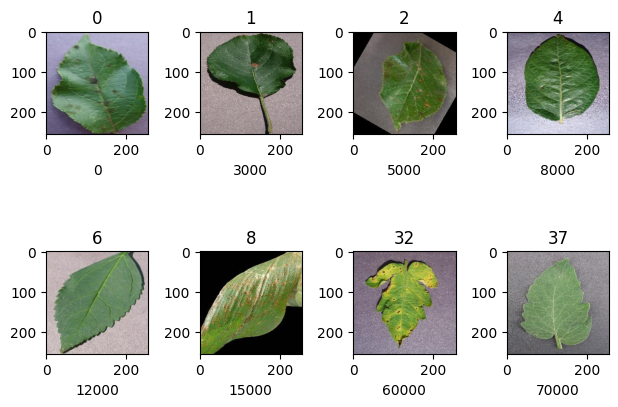

In [ ]:
print(train)

img, label = train[0]

print(img.shape, label)

def show_image(image, label):
    print("Label : " + train.classes[label] + " (" + str(label) + ")")  
    plt.imshow(image.permute(1, 2, 0)) 
image_list = [0, 3000, 5000, 8000, 12000, 15000, 60000, 70000]

chs = 0  
for img in image_list:
    chs += 1
    plt.subplot(2, 4, chs)  
    plt.tight_layout()  
    plt.xlabel(img, fontsize=10) 
    plt.title(train[img][1]) 
    show_image(*train[img])  


In [ ]:
batch_size = 32

train_dataloader = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dataloader = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dataloader:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dataloader)

device = get_default_device()

train_dataloader = DeviceDataLoader(train_dataloader, device)
valid_dataloader = DeviceDataLoader(valid_dataloader, device)

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  
        loss = F.cross_entropy(out, labels) 
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                   
        loss = F.cross_entropy(out, labels)   
        acc = accuracy(out, labels)           
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()    
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)

class CNN_NeuralNet(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) 
        self.conv4 = ConvBlock(256, 512, pool=True)
        
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out        

model = to_device(CNN_NeuralNet(3, len(train.classes)), device)
print(model)


CNN_NeuralNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpl

In [7]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []  
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr,
                                                epochs=epochs, steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()

            lrs.append(get_lr(optimizer))
            sched.step()
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history


In [ ]:
num_epoch = 5          
lr_rate = 0.01         
grad_clip = 0.15       
weight_decay = 1e-4    
optims = torch.optim.Adam  
history = [evaluate(model, valid_dataloader)]
history += fit_OneCycle(
    num_epoch, lr_rate, model, train_dataloader, valid_dataloader, 
    grad_clip=grad_clip, 
    weight_decay=weight_decay, 
    opt_func=optims
)


Epoch [0], train_loss: 0.6893, val_loss: 0.9581, val_acc: 0.7484
Epoch [1], train_loss: 0.3271, val_loss: 0.4191, val_acc: 0.8676
Epoch [2], train_loss: 0.2317, val_loss: 0.2510, val_acc: 0.9185
Epoch [3], train_loss: 0.0984, val_loss: 0.0468, val_acc: 0.9844
Epoch [4], train_loss: 0.0251, val_loss: 0.0234, val_acc: 0.9931


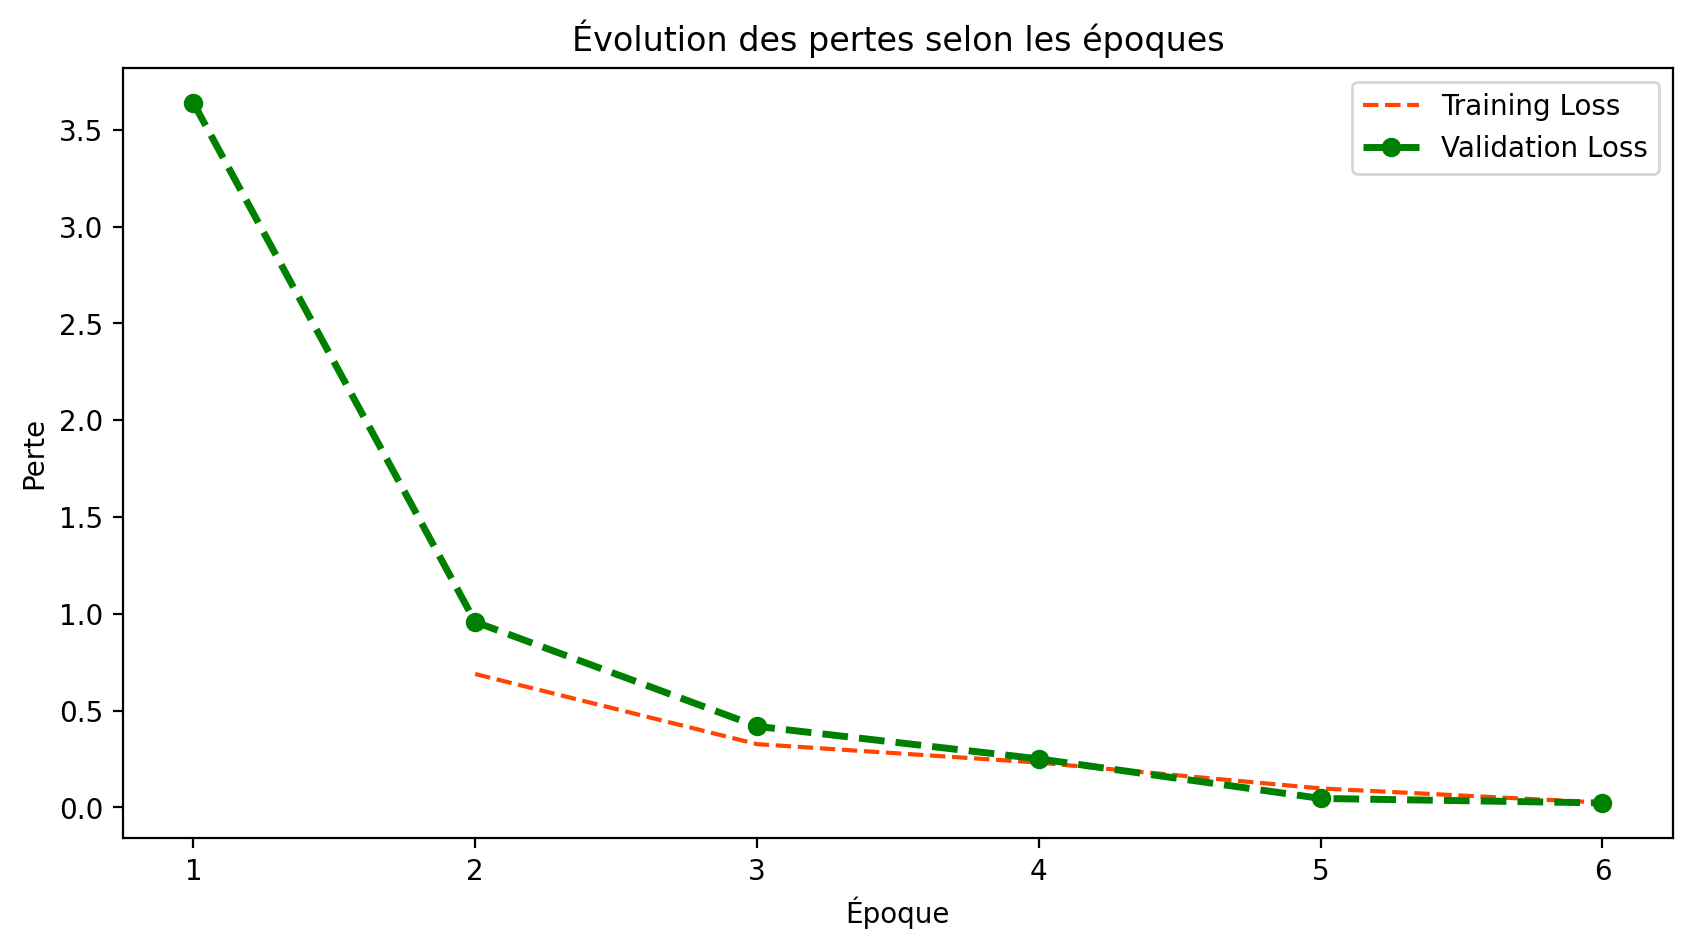

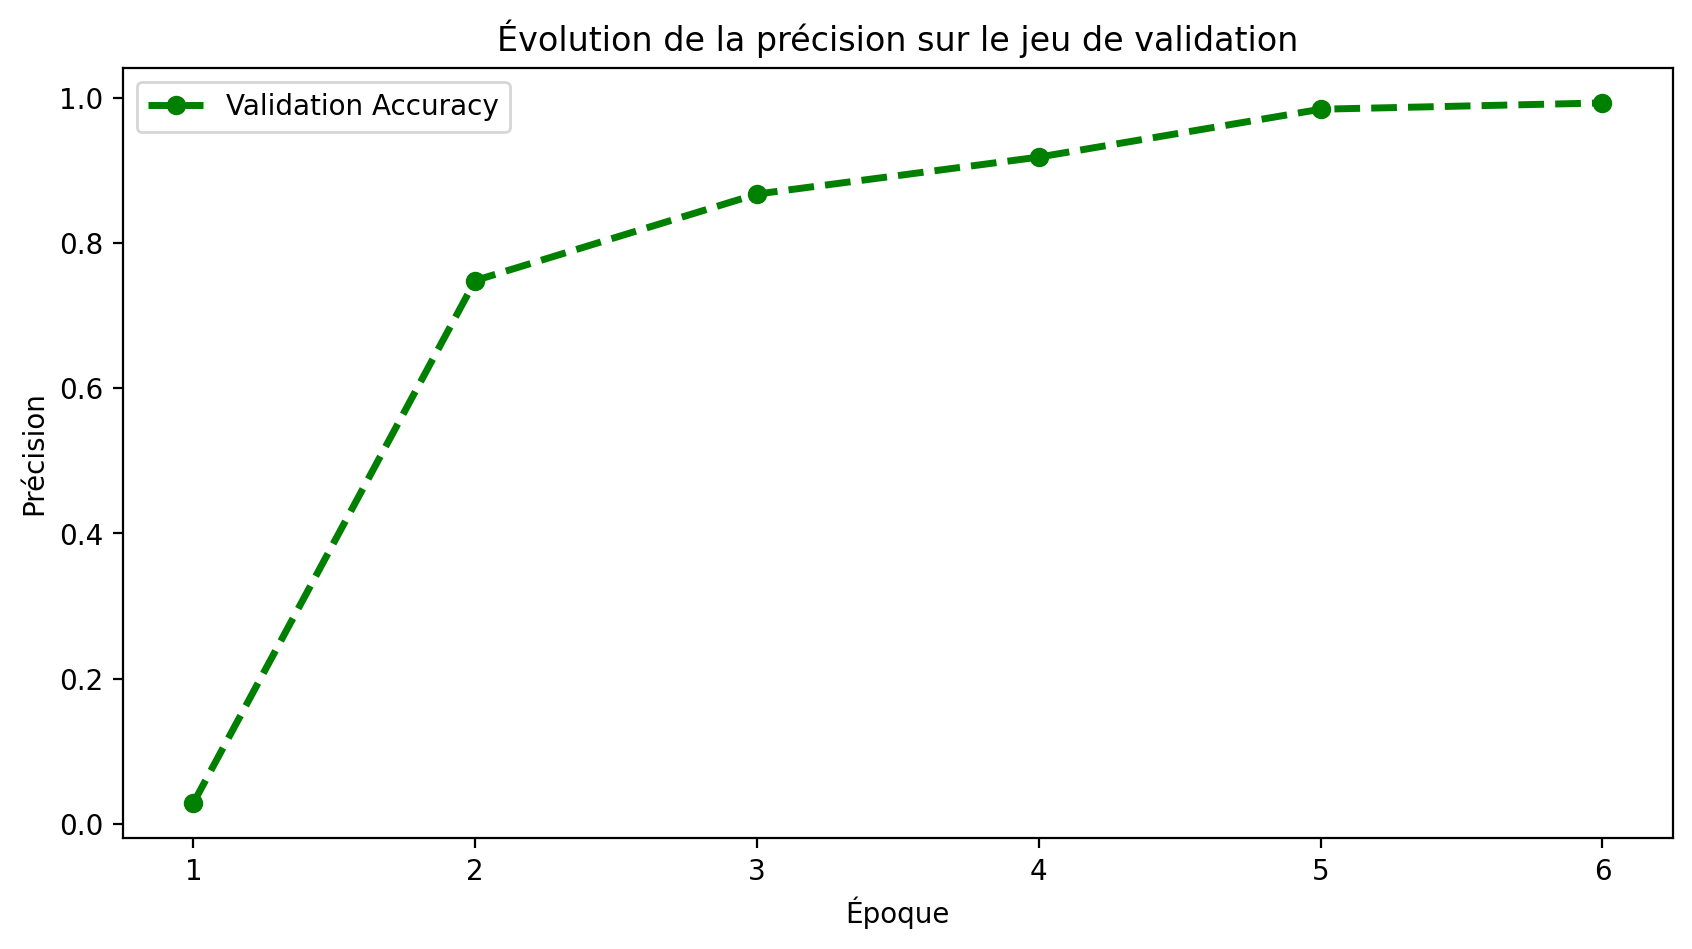

In [ ]:
val_acc = []    
val_loss = []   
train_loss = [] 
for i in history:
    val_acc.append(i['val_acc'])
    val_loss.append(i['val_loss'])
    train_loss.append(i.get('train_loss'))
epoch_count = range(1, 7)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, train_loss, 'r--', color='orangered', label='Training Loss')
plt.plot(epoch_count, val_loss, '--bo', color='green', linewidth=2.5, label='Validation Loss')
plt.legend()
plt.title('Évolution des pertes selon les époques')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.xticks(np.arange(1,7,1))
plt.show()
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, val_acc, '--bo', color='green', linewidth=2.5, label='Validation Accuracy')
plt.legend()
plt.title('Évolution de la précision sur le jeu de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.xticks(np.arange(1,7,1))
plt.show()

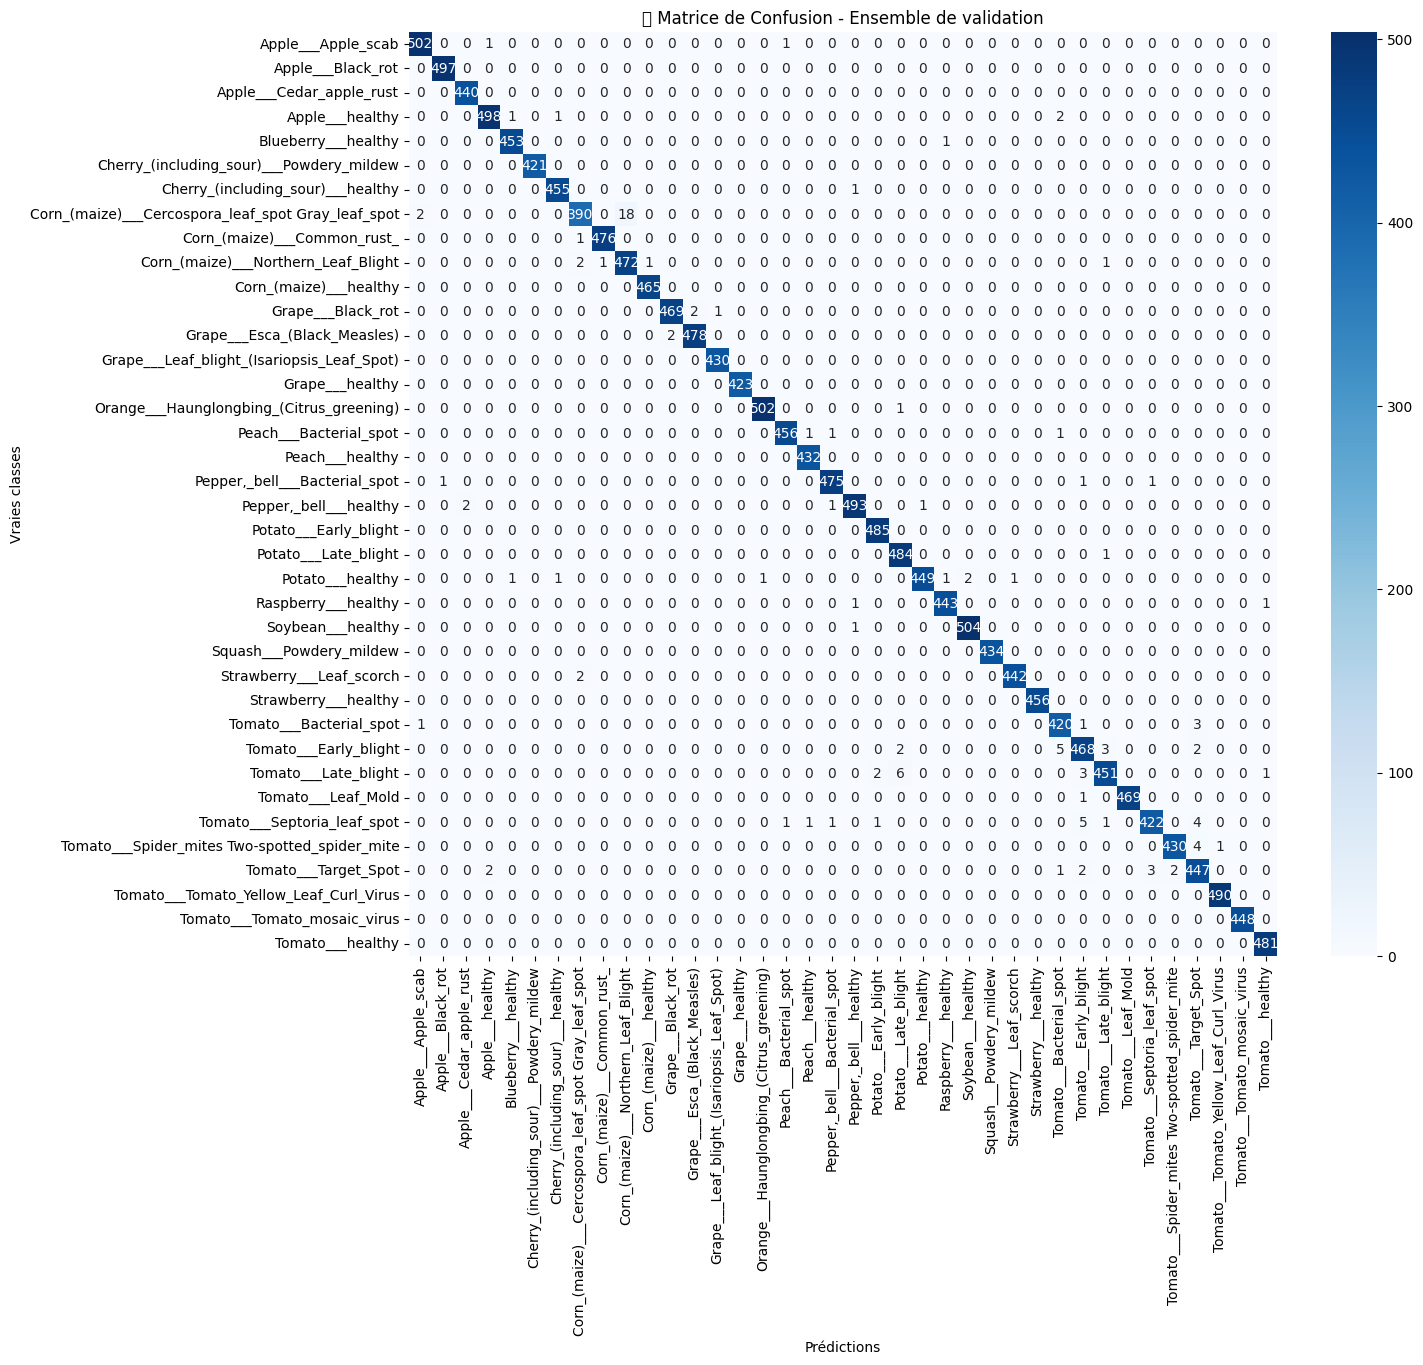

=== Rapport de Classification ===
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      1.00      1.00       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       440
                                   Apple___healthy       0.99      0.99      0.99       502
                               Blueberry___healthy       1.00      1.00      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.95      0.97       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_B

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np
model.eval()
all_preds = []
with torch.no_grad():
    for images, labels in valid_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, dim=1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train.classes, yticklabels=train.classes)
plt.title("🔍 Matrice de Confusion - Ensemble de validation")
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.show()
print("=== Rapport de Classification ===")
print(classification_report(all_labels, all_preds, target_names=train.classes))


In [12]:
torch.save(model.state_dict(), "plant_disease_model.pth")

In [ ]:
from IPython.display import FileLink
FileLink(r'plant_disease_model.pth')


/kaggle/working/plant_disease_model.pth